In [9]:
# data science
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func


In [11]:
# Create engine using the `hawaii.sqlite` database file
filepath = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{filepath}")


In [12]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)


In [13]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [14]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

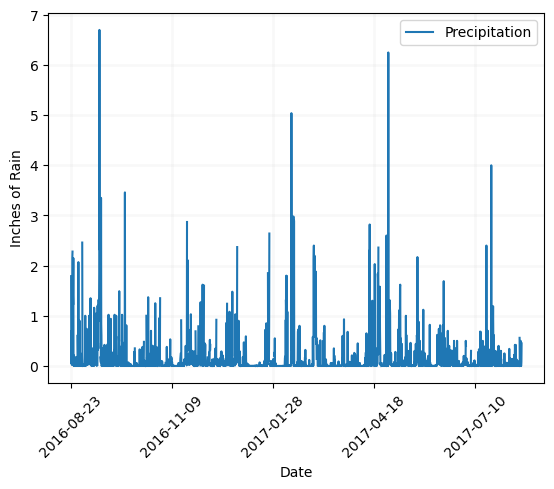

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
prev_yr = dt.date(2017, 8, 23) - dt.timedelta(days=365) 

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_yr)
                

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=["Date", "Precipitation"])

# Sort the dataframe by date
df = df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x = "Date", y = "Precipitation", rot=45)
plt.grid(color='lightgrey', linestyle='-', linewidth=2, alpha=.15)
plt.xlabel("Date")
plt.ylabel("Inches of Rain")
plt.show()

In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).\
    all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    all()

[(54.0, 85.0, 71.66378066378067)]

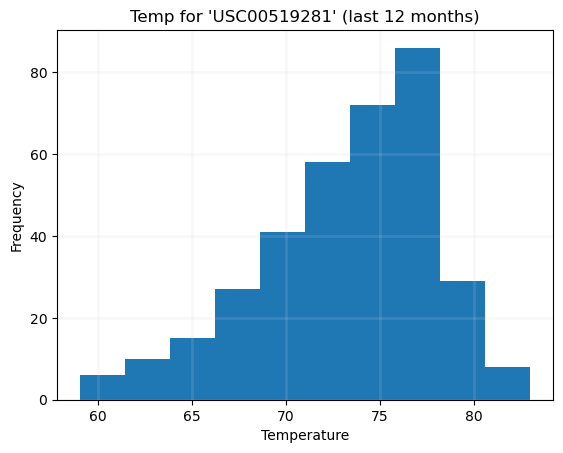

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_yr = dt.date(2017, 8, 23) - dt.timedelta(days=365) 

results = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.date >= prev_yr).\
    filter(Measurement.station == 'USC00519281')
df = pd.DataFrame(results, columns=["Date", "Station", "Temperature"])
df = df.sort_values("Date")
# histogram
plt.hist(df.Temperature)
plt.title("Temp for 'USC00519281' (last 12 months)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid(color='lightgrey', linestyle='-', linewidth=2, alpha=.15)
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()
